In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import poisson
% matplotlib inline

In [2]:
df = pd.read_csv("../xgbetting/data/eng/01.csv")

In [3]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC',
       'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR', 'HBP', 'ABP',
       'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH',
       'SBD', 'SBA', 'WHH', 'WHD', 'WHA'],
      dtype='object')

In [4]:
df = df.sort_values("Date")

In [5]:
df.head(20)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA
207,E0,01/01/01,Coventry,Man City,1,1,D,0,0,D,...,3.10,1.91,3.25,3.40,1.85,3.30,3.60,1.80,3.30,3.75
205,E0,01/01/01,Charlton,Arsenal,1,0,H,1,0,H,...,2.00,3.50,3.20,1.91,3.60,3.25,1.90,3.40,3.25,1.90
206,E0,01/01/01,Chelsea,Aston Villa,1,0,H,1,0,H,...,3.80,1.50,3.40,6.00,1.57,3.30,5.00,1.61,3.25,5.00
213,E0,01/01/01,Sunderland,Ipswich,4,1,H,1,1,D,...,3.10,1.73,3.50,3.75,1.75,3.40,4.00,1.83,3.30,3.60
212,E0,01/01/01,Man United,West Ham,3,1,H,2,0,H,...,5.50,1.33,4.00,8.00,1.30,4.50,8.00,1.28,4.50,8.00
211,E0,01/01/01,Liverpool,Southampton,2,1,H,1,1,D,...,6.20,1.36,3.75,8.00,1.33,4.20,8.00,1.30,4.00,9.50
210,E0,01/01/01,Leicester,Bradford,1,2,A,1,2,A,...,4.70,1.40,3.75,7.00,1.40,3.75,7.00,1.40,3.60,7.50
209,E0,01/01/01,Leeds,Middlesbrough,1,1,D,0,1,A,...,4.50,1.61,3.50,4.50,1.53,3.50,5.50,1.57,3.25,5.50
208,E0,01/01/01,Derby,Everton,1,0,H,1,0,H,...,2.90,1.91,3.40,3.25,1.91,3.25,3.50,1.83,3.30,3.60
304,E0,01/04/01,Charlton,Leicester,2,0,H,1,0,H,...,2.90,1.91,3.25,3.40,2.10,3.25,3.00,2.00,3.20,3.20


In [6]:
hfa = 100
k = 20

In [7]:
def get_expected_rating(home_rating, away_rating):
    return 1 / (10**(-1 * (home_rating + hfa - away_rating) / 400) + 1) 

In [8]:
def get_result(home_goals, away_goals):
    if home_goals == away_goals:
        return 0.5
    elif home_goals > away_goals:
        return 1
    else:
        return 0

In [9]:
def get_goal_diff_mult(home_goals, away_goals):
    if home_goals == away_goals:
        return 1
    else:
        return abs(home_goals - away_goals) ** 0.5

In [10]:
def update_elo(home_rating, away_rating, home_goals, away_goals):
    exp = get_expected_rating(home_rating, away_rating)
    result = get_result(home_goals, away_goals)
    gd = get_goal_diff_mult(home_goals, away_goals)
    rating_change = int(round(k * gd * (result - exp), 0))
    return home_rating + rating_change, away_rating - rating_change
    

In [11]:
def expected_result_from_diff(diff):
    return 1 / (10**(-1 * (diff + hfa) / 400) + 1) 
    

In [12]:
df = pd.read_csv("../xgbetting/data/eng/01.csv", parse_dates=["Date"], dayfirst=True)

df.sort_values("Date", inplace=True)

df["home_elo"] = np.nan
df["away_elo"] = np.nan

elo_dict = {side: 1000 for side in list(set(df.HomeTeam))}

In [13]:

for row in df.itertuples():
    i = row.Index
    ht = row.HomeTeam
    at = row.AwayTeam
    diff = elo_dict[ht] - elo_dict[at]
    prob_diff = expected_result_from_diff(diff)
    df.loc[i, "expected"] = prob_diff
    if prob_diff < 0.5: 
        hg_lam = 0.2 + 1.1*np.sqrt(prob_diff/0.5)
    else: 
        hg_lam = 1.69 / (1.12 * np.sqrt(2 - prob_diff / 0.5) + 0.18)

    if prob_diff < 0.8: 
        ag_lam = -0.96 + 1 / (0.1 + 0.44 * np.sqrt((prob_diff + 0.1) / 0.9))
    else: 
        ag_lam = 0.72 * np.sqrt((1 - prob_diff) / 0.3) + 0.3
    
    p_win = 0
    p_draw = 0
    p_loss = 0
    
    ph = poisson.pmf(list(range(9)), hg_lam)
    pa = poisson.pmf(list(range(9)), ag_lam)
    for h in range(9):
        for a in range(9):
            if h == a:
                p_draw += pa[a] * ph[h]
            elif h > a:
                p_win += pa[a] * ph[h]
            elif h < a:
                p_loss += pa[a] * ph[h]
        
    df.loc[i, "hg_lam"] = hg_lam
    df.loc[i, "ag_lam"] = ag_lam
    df.loc[i, "p_win"] = p_win
    df.loc[i, "p_loss"] = p_loss
    df.loc[i, "p_draw"] = p_draw
    home_elo, away_elo = update_elo(elo_dict[ht], elo_dict[at], 
                                   row.FTHG, row.FTAG)
    hfa = 0.075 * (home_elo - elo_dict[ht])
    elo_dict[ht] = home_elo
    elo_dict[at] = away_elo
    df.loc[i, "home_elo"] = home_elo
    df.loc[i, "away_elo"] = away_elo    

In [14]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,WHD,WHA,home_elo,away_elo,expected,hg_lam,ag_lam,p_win,p_loss,p_draw
0,E0,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,3.2,3.10,1014.0,986.0,0.640065,1.495224,1.044032,0.476130,0.264419,0.259422
1,E0,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,3.6,6.50,1014.0,986.0,0.501511,1.301696,1.215282,0.386183,0.345133,0.268670
2,E0,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3.2,2.62,986.0,1014.0,0.501511,1.301696,1.215282,0.386183,0.345133,0.268670
3,E0,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,3.2,3.20,1000.0,1000.0,0.498489,1.298337,1.219571,0.384367,0.346955,0.268663
4,E0,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,3.5,4.50,1014.0,986.0,0.500000,1.300000,1.217423,0.385271,0.346046,0.268668


In [15]:
path = "../xgbetting/data/eng/"
df_old = df.copy()
for file in sorted(os.listdir("../xgbetting/data/eng/")):
    if int(file[0:2]) > 1:
        print(file)
        df_new = pd.read_csv(path + file, parse_dates=["Date"], dayfirst=True,  encoding="latin-1")
        old_sides = list(set(df_old.HomeTeam.dropna()))
        new_sides = list(set(df_new.HomeTeam.dropna()))
        relegated_sides = np.setdiff1d(old_sides, new_sides)
        promoted_sides = np.setdiff1d(new_sides, old_sides)
        relegated_elo_avg = int(sum([elo_dict.pop(side) for side in relegated_sides]) / 3)
        elo_dict.update({side: relegated_elo_avg for side in promoted_sides})
        for row in df_new.itertuples():
            i = row.Index
            ht = row.HomeTeam
            at = row.AwayTeam
            diff = elo_dict[ht] - elo_dict[at]
            prob_diff = expected_result_from_diff(diff)
            df.loc[i, "expected"] = prob_diff
            if prob_diff < 0.5: 
                hg_lam = 0.2 + 1.1*np.sqrt(prob_diff/0.5)
            else: 
                hg_lam = 1.69 / (1.12 * np.sqrt(2 - prob_diff / 0.5) + 0.18)
    
            if prob_diff < 0.8: 
                ag_lam = -0.96 + 1 / (0.1 + 0.44 * np.sqrt((prob_diff + 0.1) / 0.9))
            else: 
                ag_lam = 0.72 * np.sqrt((1 - prob_diff) / 0.3) + 0.3
            p_win = 0
            p_draw = 0
            p_loss = 0
    
            ph = poisson.pmf(list(range(9)), hg_lam)
            pa = poisson.pmf(list(range(9)), ag_lam)
            for h in range(9):
                for a in range(9):
                    if h == a:
                        p_draw += pa[a] * ph[h]
                    elif h > a:
                        p_win += pa[a] * ph[h]
                    elif h < a:
                        p_loss += pa[a] * ph[h]
        
            df.loc[i, "hg_lam"] = hg_lam
            df.loc[i, "ag_lam"] = ag_lam
            df.loc[i, "p_win"] = p_win
            df.loc[i, "p_loss"] = p_loss
            df.loc[i, "p_draw"] = p_draw
            
            df.loc[i, "hg_lam"] = hg_lam
            df.loc[i, "ag_lam"] = ag_lam
    
            home_elo, away_elo = update_elo(elo_dict[ht], elo_dict[at], 
                                           row.FTHG, row.FTAG)
            hfa = 0.075 * (home_elo - elo_dict[ht])
            elo_dict[ht] = home_elo
            elo_dict[at] = away_elo
            df_new.loc[i, "home_elo"] = home_elo
            df_new.loc[i, "away_elo"] = away_elo
        df = pd.concat([df, df_new])
            
        df_old = df_new
        

02.csv
03.csv
04.csv
05.csv
06.csv
07.csv
08.csv
09.csv
10.csv
11.csv
12.csv
13.csv
14.csv
15.csv
16.csv
17.csv
18.csv
19.csv


In [16]:

# taken from https://drive.google.com/file/d/0Bxr6KEe4KY_OYnJuLUw1WF9GcGs/view
df["p_draw"] = df.expected.apply(lambda x: (4 / 3) * x * (1 - x))
df["p_win"] = df.expected - (0.5 * df.p_draw)
df["p_loss"] = 1 - df.expected - (0.5 * df.p_draw)

In [28]:
df["odds_draw"] = 1 / df.p_draw
df["odds_win"] = 1 / df.p_win
df["odds_loss"] = 1/ df.p_loss

In [29]:
df["home_diff"] = (df.BbMxH - df.odds_win) / df.odds_win * 100
df["away_diff"] = (df.BbMxA - df.odds_loss) / df.odds_loss * 100
df["draw_diff"] = (df.BbMxD - df.odds_draw) / df.odds_draw * 100

In [30]:
df["checksum"] = df.p_draw + df.p_win + df.p_loss

In [31]:
df.checksum.max()

1.0

In [32]:
df.checksum.min()

0.9999999999999999

In [33]:
df[df.checksum < 0.995]

,ABP,AC,AF,AHW,AO,AR,AS,AST,AY,Attendance,...,p_draw,p_loss,p_win,odds_draw,odds_win,odds_loss,checksum,home_diff,away_diff,draw_diff


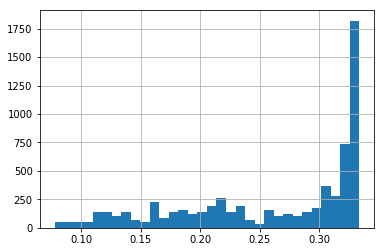

In [34]:
df.p_draw.hist(bins=32)

In [25]:
df[df.BbMxA.isnull()].Date.max()

Timestamp('2005-05-15 00:00:00')

In [38]:
print(len(df[df.away_diff > 20]))

2457


In [39]:
print(len(df[df.home_diff > 20] ))

1387


In [121]:
df[df.odds_win.isnull()].Date.max()

Timestamp('2005-05-15 00:00:00')

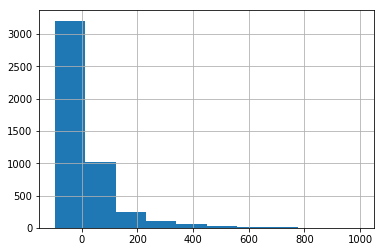

In [37]:
df.home_diff.hist()

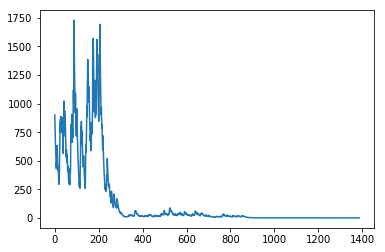

In [40]:
money = 1000
percent = 0.1
total_staked = 0
total_won = 0
money_history = []
# for row in df[(df.loss_diff < -0.3) & (df.expected < 0.6) & (df.expected > 0.4)].itertuples():
for row in df[(df.home_diff > 20)].itertuples():

    stake = money * percent
    money -= stake
    total_staked += stake
    
    if row.FTR == "H":
        money += row.BbMxH * 0.99 * stake
        total_won += row.BbMxH * 0.99 * stake
    money_history.append(money)
plt.plot(money_history)

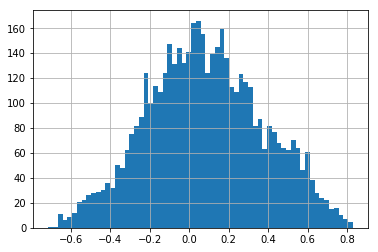

In [124]:
df.loss_diff.hist(bins=64)

In [125]:
total_won / total_staked

0.9925336075442224

In [126]:
money

5.2172855281375226

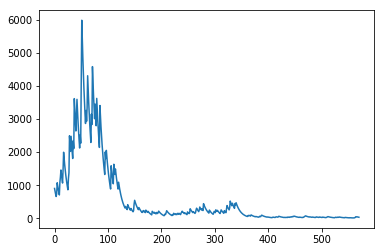

In [41]:
money = 1000
percent = 0.1
money_history = []
total_staked = 0
total_won = 0
for row in df[(df.home_diff > 20) & (df.expected < 0.7) & (df.expected > 0.3)].itertuples():
# for row in df[(df.win_diff > 0.2)].itertuples():
    stake = money * percent
    money -= stake
    total_staked += stake
    if row.FTR == "H":
        
        money += row.BbMxH * 0.99 * stake
        total_won += row.BbMxH * 0.99 * stake
    money_history.append(money)
plt.plot(money_history)

In [128]:
money

8459.97836814654

In [129]:
total_won / total_staked

1.21329238384238

In [130]:
len(money_history)

206

In [131]:
max(money_history)

9399.975964607267

In [132]:
min(money_history)

510.4049121821525

# With Pinnacle

In [236]:
df_p = df[~df.PSH.isnull()]

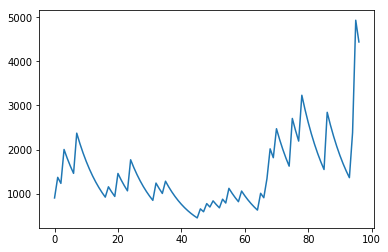

In [237]:
money = 1000
percent = 0.1
money_history = []
total_staked = 0
total_won = 0
for row in df_p[(df_p.win_diff > 0.2) & (df_p.expected < 0.7) & (df_p.expected > 0.3)].itertuples():
# for row in df[(df.win_diff > 0.2)].itertuples():
    stake = money * percent
    money -= stake
    total_staked += stake
    if row.FTR == "H":
        money += row.PSH * stake
        total_won += row.PSH * stake
    money_history.append(money)
plt.plot(money_history)

In [238]:
money

4442.928447353714

In [239]:
total_won / total_staked

1.2476124015893968

In [240]:
len(money_history)

97

In [241]:
max(money_history)

4936.587163726348

In [242]:
min(money_history)

446.3431828620015

# With Kelly

0.3045073360506402
0.23009743262223767
0.3604264415870068
0.40757195602445756
0.311419711653022
0.3121986329928799
0.416633726639327
0.49806225109468777
0.3599940336277037
0.26133223649592585
0.4330060467076154
0.2749664131974789
0.22977967383780992
0.3866468046989025
0.26822051424604954
0.25700062693682857
0.32865100270411884
0.433188972465016
0.24849863310914572
0.44435270308638597
0.2463155516239391
0.35573882566463666
0.4439283842617653
0.2598623234926302
0.263610016014198
0.2833703318238917
0.3824542509303804
0.4752816595111998
0.293888635284793
0.40452768420589796
0.45063313493220497
0.4738189154250407
0.23863226237530283
0.2287902953205198
0.2581367426831858
0.24751311553848848
0.27207863008003663
0.2931149341076137
0.3004121431446934
0.3428916133850863
0.2817058456087319
0.24123270080276904
0.29424155402515395
0.26703852515034526
0.3243205529366555
0.38443447888514903
0.25200632520738575
0.2721246607825367
0.30973827393103887
0.470683100507402
0.3370685099223481
0.3279954240134

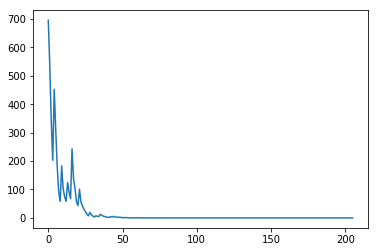

In [55]:
money = 1000
money_history = []
total_staked = 0
total_won = 0
for row in df[(df.win_diff > 0.2) & (df.expected < 0.7) & (df.expected > 0.3)].itertuples():
    kelly = ((row.p_win * row.BbMxH * 0.99) - 1) / ((row.BbMxH * 0.99) - 1)
    print(kelly)
    stake = money * kelly
    money -= stake
    total_staked += stake
    if row.FTR == "H":
        money += row.BbMxH * 0.99 * stake
        total_won += row.BbMxH * 0.99 * stake
    money_history.append(money)
plt.plot(money_history)

In [56]:
money

3.8803364797214253e-07

In [57]:
total_won / total_staked

0.4596952156804987

In [58]:
len(money_history)

206

In [59]:
max(money_history)

695.4926639493599

In [60]:
min(money_history)

3.4487365982926225e-08

In [61]:
money = 1000
percent = 0.1
for row in df[df.draw_diff > 0.1].itertuples():
    stake = money * percent
    money -= stake
    if row.FTR == "D":
        money += row.BbMxD * 0.99 * stake

In [62]:
money

7.47779478646512e-06

In [63]:
len(df[df.draw_diff > 0.1])

593

Checking Pinnacle odds

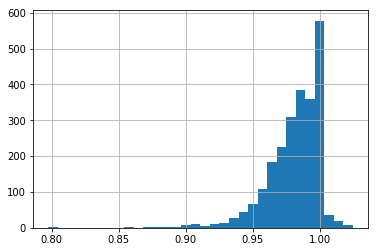

In [189]:
(df.PSD / df.BbMxD).hist(bins=32)

In [191]:
np.mean(df.PSD / df.BbMxD)

0.9814203677363655

In [196]:
np.median((df.PSD / df.BbMxD).dropna())

0.9853658536585367

In [199]:
np.mean(df.PSA / df.BbMxA)

0.9683649710697675

In [200]:
np.median((df.PSA / df.BbMxA).dropna())

0.9775

In [197]:
np.mean(df.PSH/ df.BbMxH)

0.9741124846492875

In [198]:
np.median((df.PSH / df.BbMxH).dropna())

0.9784714497589915

# To do
1. Try other leagues
2. optimise k
3. optimise the power of the GD factor to something other than 0.5?


# Turkey

In [14]:
df = pd.read_csv("../xgbetting/data/tur/01.csv", parse_dates=["Date"], dayfirst=True)

df.sort_values("Date", inplace=True)

df["home_elo"] = np.nan
df["away_elo"] = np.nan

elo_dict = {side: 1000 for side in list(set(df.HomeTeam))}

In [15]:

for row in df.itertuples():
    i = row.Index
    ht = row.HomeTeam
    at = row.AwayTeam
    diff = elo_dict[ht] - elo_dict[at]
    prob_diff = expected_result_from_diff(diff)
    df.loc[i, "expected"] = prob_diff
    if prob_diff < 0.5: 
        hg_lam = 0.2 + 1.1*np.sqrt(prob_diff/0.5)
    else: 
        hg_lam = 1.69 / (1.12 * np.sqrt(2 - prob_diff / 0.5) + 0.18)

    if prob_diff < 0.8: 
        ag_lam = -0.96 + 1 / (0.1 + 0.44 * np.sqrt((prob_diff + 0.1) / 0.9))
    else: 
        ag_lam = 0.72 * np.sqrt((1 - prob_diff) / 0.3) + 0.3
    
    p_win = 0
    p_draw = 0
    p_loss = 0
    
    ph = poisson.pmf(list(range(9)), hg_lam)
    pa = poisson.pmf(list(range(9)), ag_lam)
    for h in range(9):
        for a in range(9):
            if h == a:
                p_draw += pa[a] * ph[h]
            elif h > a:
                p_win += pa[a] * ph[h]
            elif h < a:
                p_loss += pa[a] * ph[h]
        
    df.loc[i, "hg_lam"] = hg_lam
    df.loc[i, "ag_lam"] = ag_lam
    df.loc[i, "p_win"] = p_win
    df.loc[i, "p_loss"] = p_loss
    df.loc[i, "p_draw"] = p_draw
    home_elo, away_elo = update_elo(elo_dict[ht], elo_dict[at], 
                                   row.FTHG, row.FTAG)
    hfa = 0.075 * (home_elo - elo_dict[ht])
    elo_dict[ht] = home_elo
    elo_dict[at] = away_elo
    df.loc[i, "home_elo"] = home_elo
    df.loc[i, "away_elo"] = away_elo    

In [16]:
path = "../xgbetting/data/tur/"
df_old = df.copy()
for file in sorted(os.listdir("../xgbetting/data/tur/")):
    if (int(file[0:2]) > 1) & (int(file[0:2]) < 13):
        print(file)
        df_new = pd.read_csv(path + file, parse_dates=["Date"], dayfirst=True,  encoding="latin-1")
        old_sides = list(set(df_old.HomeTeam.dropna()))
        new_sides = list(set(df_new.HomeTeam.dropna()))
        relegated_sides = np.setdiff1d(old_sides, new_sides)
        promoted_sides = np.setdiff1d(new_sides, old_sides)
        relegated_elo_avg = int(sum([elo_dict.pop(side) for side in relegated_sides]) / 3)
        elo_dict.update({side: relegated_elo_avg for side in promoted_sides})
        for row in df_new.itertuples():
            i = row.Index
            ht = row.HomeTeam
            at = row.AwayTeam
            diff = elo_dict[ht] - elo_dict[at]
            prob_diff = expected_result_from_diff(diff)
            df.loc[i, "expected"] = prob_diff
            if prob_diff < 0.5: 
                hg_lam = 0.2 + 1.1*np.sqrt(prob_diff/0.5)
            else: 
                hg_lam = 1.69 / (1.12 * np.sqrt(2 - prob_diff / 0.5) + 0.18)
    
            if prob_diff < 0.8: 
                ag_lam = -0.96 + 1 / (0.1 + 0.44 * np.sqrt((prob_diff + 0.1) / 0.9))
            else: 
                ag_lam = 0.72 * np.sqrt((1 - prob_diff) / 0.3) + 0.3
            p_win = 0
            p_draw = 0
            p_loss = 0
    
            ph = poisson.pmf(list(range(9)), hg_lam)
            pa = poisson.pmf(list(range(9)), ag_lam)
            for h in range(9):
                for a in range(9):
                    if h == a:
                        p_draw += pa[a] * ph[h]
                    elif h > a:
                        p_win += pa[a] * ph[h]
                    elif h < a:
                        p_loss += pa[a] * ph[h]
        
            df.loc[i, "hg_lam"] = hg_lam
            df.loc[i, "ag_lam"] = ag_lam
            df.loc[i, "p_win"] = p_win
            df.loc[i, "p_loss"] = p_loss
            df.loc[i, "p_draw"] = p_draw
            
            df.loc[i, "hg_lam"] = hg_lam
            df.loc[i, "ag_lam"] = ag_lam
    
            home_elo, away_elo = update_elo(elo_dict[ht], elo_dict[at], 
                                           row.FTHG, row.FTAG)
            hfa = 0.075 * (home_elo - elo_dict[ht])
            elo_dict[ht] = home_elo
            elo_dict[at] = away_elo
            df_new.loc[i, "home_elo"] = home_elo
            df_new.loc[i, "away_elo"] = away_elo
        df = pd.concat([df, df_new])
            
        df_old = df_new
        

02.csv
03.csv
04.csv
05.csv
06.csv
07.csv
08.csv
09.csv
10.csv
11.csv
12.csv


In [28]:
df_late = df[df.Date > pd.datetime(2002, 7, 1)]

In [29]:

# taken from https://drive.google.com/file/d/0Bxr6KEe4KY_OYnJuLUw1WF9GcGs/view
df["p_draw"] = df.expected.apply(lambda x: (4 / 3) * x * (1 - x))
df["p_win"] = df.expected - (0.5 * df.p_draw)
df["p_loss"] = 1 - df.expected - (0.5 * df.p_draw)

In [30]:
df["odds_win"] = 1 / df.BbMxH 
df["odds_draw"] = 1 / df.BbMxD
df["odds_loss"] = 1 / df.BbMxA 

In [31]:
df["win_diff"] =  df.p_win - df.odds_win
df["draw_diff"] = df.p_draw - df.odds_draw
df["loss_diff"] = df.p_loss - df.odds_loss

In [33]:
df_late = df[df.Date > pd.datetime(2002, 7, 1)]

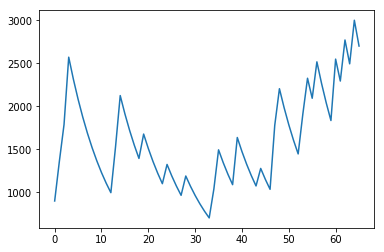

In [38]:
money = 1000
percent = 0.1
money_history = []
total_staked = 0
total_won = 0
for row in df_late[(df_late.win_diff > 0.2) & (df_late.expected < 0.7) & (df_late.expected > 0.3)].itertuples():
# for row in df[(df.win_diff > 0.2)].itertuples():
    stake = money * percent
    money -= stake
    total_staked += stake
    if row.FTR == "H":
        money += row.BbMxH * 0.978 * stake
        total_won += row.BbMxH * 0.978 * stake
    money_history.append(money)
plt.plot(money_history)

In [39]:
money

2702.558800557113

In [40]:
total_won / total_staked

1.1631692930477395

In [37]:
len(money_history)

66

In [161]:
max(money_history)

3250.9894128959363

In [162]:
min(money_history)

726.0764654798477

In [164]:
df.columns

Index(['AwayTeam', 'B365A', 'B365D', 'B365H', 'BSA', 'BSD', 'BSH', 'BWA',
       'BWD', 'BWH', 'Bb1X2', 'BbAH', 'BbAHh', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA',
       'BbAvAHA', 'BbAvAHH', 'BbAvD', 'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA',
       'BbMxAHA', 'BbMxAHH', 'BbMxD', 'BbMxH', 'BbOU', 'Date', 'Div', 'FTAG',
       'FTHG', 'FTR', 'GB<2.5', 'GB>2.5', 'GBA', 'GBAH', 'GBAHA', 'GBAHH',
       'GBD', 'GBH', 'HTAG', 'HTHG', 'HTR', 'HomeTeam', 'IWA', 'IWD', 'IWH',
       'LBA', 'LBD', 'LBH', 'SBA', 'SBD', 'SBH', 'SJA', 'SJD', 'SJH', 'SYA',
       'SYD', 'SYH', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'VCA', 'VCD', 'VCH', 'WHA', 'WHD', 'WHH', 'ag_lam',
       'away_elo', 'expected', 'hg_lam', 'home_elo'

# Calcualte difference, look at histogram and decide on bins

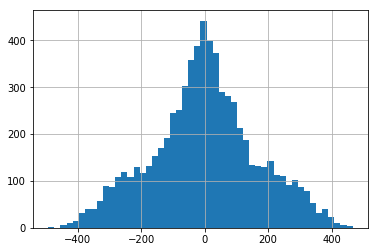

In [560]:
df.elo_diff.hist(bins=50)

In [562]:
df.elo_diff.max()

466.0

In [563]:
df.elo_diff.min()

-492.0

Divide into bins of equal size

In [573]:
df.to_csv("../xgbetting/processed/all_seasons_with_elo_k=15_hfa=75_mean_relegation.csv")

In [638]:
df_late = df[df.Date > pd.datetime(2003, 7, 1)]

In [639]:
df_late.sort_values("elo_diff", inplace=True)


/Users/alexandergreen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [644]:
win = {}
lose = {}
draw = {}
start = 0
n = 200
for i in range(int(len(df_late) / n)):
    end = start + n
    df_temp = df_late.iloc[start:end]
    key = df_temp.elo_diff.min()
    win[key] = len(df_temp[df_temp.FTR == "H"]) / (n / 100)
    lose[key] = len(df_temp[df_temp.FTR == "A"]) / (n / 100)
    draw[key] = len(df_temp[df_temp.FTR == "D"]) / (n / 100)
    start = end

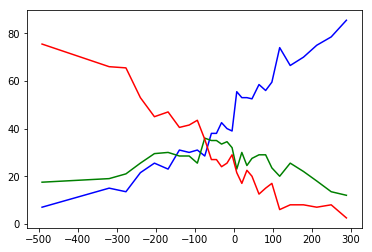

In [645]:
plt.plot(win.keys(), win.values(), "b-")
plt.plot(draw.keys(), draw.values(), "g-")
plt.plot(lose.keys(), lose.values(), "r-")

# Appendix

# 1. Which goal differene measure to use?

In [476]:
sum(elo_dict.values())

19982.0

In [115]:
x = [0,1,2,3,4,5,6,7,8,9]
def world_elo(x):
    return [1,1,1.5] + [(11 + g) / 8 for g in x if g > 2]
def lam(x):
    return [(1 + g) ** 0.45 for g in x]
def root(x):
    return [1] + [g ** 0.5 for g in x if g > 0]

In [116]:
w = world_elo(x)

In [117]:
l = lam(x)

In [118]:
r = root(x)

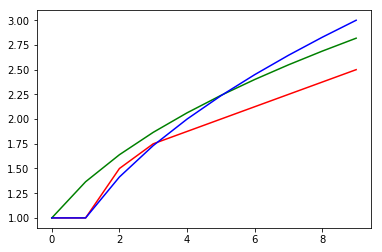

In [119]:
plt.plot(x, w, "r-")
plt.plot(x, l, "g-")
plt.plot(x, r, "b-")

In [646]:
r

[1,
 1.0,
 1.4142135623730951,
 1.7320508075688772,
 2.0,
 2.23606797749979,
 2.449489742783178,
 2.6457513110645907,
 2.8284271247461903,
 3.0]